In [11]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd

In [24]:
import datetime as dt

In [25]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [26]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [27]:
Base = automap_base()

In [28]:
Base.prepare(engine, reflect=True)

In [29]:
Base.classes.keys()

['measurement', 'station']

In [43]:
Measurement = Base.classes.measurement
Station = Base.classes.station

In [44]:
session = Session(engine)

# Precipitation Analysis

In [50]:
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"Last date: {last_date[0]}")

Last date: 2017-08-23


In [51]:
last_date = dt.datetime.strptime(last_date[0], '%Y-%m-%d')

In [75]:
query_date = dt.date(last_date.year -1, last_date.month, last_date.day)
sel = [Measurement.date, Measurement.prcp]
query_result = session.query(*sel).filter(Measurement.date >= query_date).all()
precipitation_df = pd.DataFrame(query_result, columns=['Date','precipitation'])
precipitation_df = precipitation_df.dropna(how='any')

In [76]:
precipitation_df = precipitation_df.sort_values(["Date"], ascending = True)
precipitation_df = precipitation_df.set_index("Date")
precipitation_df.head()

,precipitation
Date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


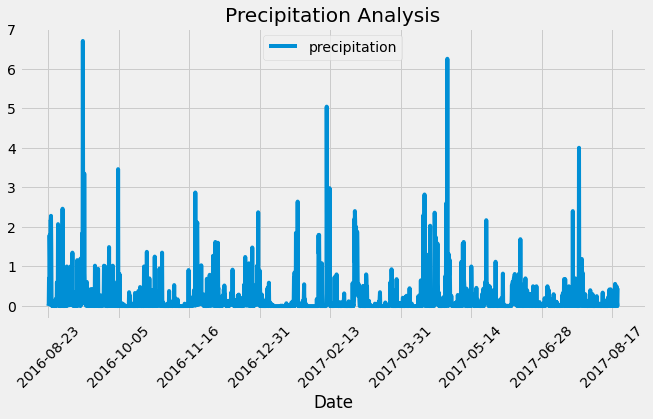

In [77]:
precipitation_df.plot(title="Precipitation Analysis", figsize=(10,5))
plt.xticks(rotation = 45)
plt.legend(loc='upper center')
plt.show()

In [78]:
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis

In [79]:
station_count = session.query(Measurement.station).distinct().count()
station_count

9

In [95]:
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [96]:
sel = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

min_max_avg_temp = session.query(*sel).\
    filter(Measurement.station == "USC00519281").all()
min_max_avg_temp

[(54.0, 85.0, 71.66378066378067)]

In [97]:
tobs_data = session.query(Measurement.tobs).\
    filter(Measurement.date >= query_date).\
    filter(Measurement.station == "USC00519281").\
    order_by(Measurement.date).all()

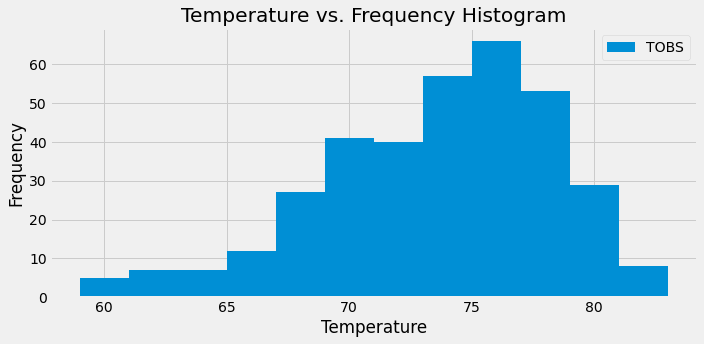

In [98]:
tobs_data_df = pd.DataFrame(tobs_data, columns=["TOBS"])

tobs_data_df.plot.hist(bins=12, title="Temperature vs. Frequency Histogram", figsize=(10,5))
plt.xlabel("Temperature")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()